<a href="https://colab.research.google.com/github/hardikroutray/ECG/blob/main/ECG_1dCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
%pylab inline
%config InlineBackend.figure_formats = ['retina']
from imutils import paths
import time   # time1 = time.time(); print('Time taken: {:.1f} sec'.format(time.time() - time1))
import cv2
import pickle
import warnings
warnings.filterwarnings("ignore")
import pickle


Populating the interactive namespace from numpy and matplotlib


In [ ]:

import keras
import keras.utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

from tensorflow.keras import utils as np_utils

from keras.utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split


In [ ]:
from tensorflow import keras 
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense

In [ ]:
from google.colab import drive
drive.mount._DEBUG = True
drive.mount('/content/MyDrive', force_remount=True)

unset HISTFILE; export PS1="root@c7fba1111d0b-06c45ba497424d989d006178dd991ba2: "
bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
/content# root@c7fba1111d0b-06c45ba497424d989d006178dd991ba2: umount -f /content/MyDrive || umount /content/MyDrive; pkill -9 -x drive
root@c7fba1111d0b-06c45ba497424d989d006178dd991ba2: pkill -9 -f /opt/google/drive/directoryprefetcher_binary
root@c7fba1111d0b-06c45ba497424d989d006178dd991ba2: ( while `sleep 0.5`; do if [[ -d "/content/MyDrive" && "$(ls -A /content/MyDrive)" != "" ]]; then echo "google.colab.drive MOUNTED"; break; fi; done ) &
[1] 323
root@c7fba1111d0b-06c45ba497424d989d006178dd991ba2: cat /tmp/tmp4kvs3n2n/drive.fifo | head -1 | ( /opt/google/drive/drive --features=fuse_max_background:1000,max_read_qps:1000,max_write_qps:1000,max_operation_batch_size:15,max_parallel_push_task_instances:10,opendir_timeout_ms:120000,virtual_folders_omit_spaces:true --inet_family=IPV4_ONLY --prefe

In [ ]:
# Enter the directory
!cd /content/MyDrive/MyDrive/ECG/


In [ ]:
with open('/content/MyDrive/MyDrive/ECG/dataset_dict.pickle', 'rb') as file:
    dataset_dict = pickle.load(file)
    

In [ ]:
dataset_dict.keys()

dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])

In [ ]:
x_train1=dataset_dict['X_train']
x_test1=dataset_dict['X_test']

y_train1=dataset_dict['y_train']
y_test1=dataset_dict['y_test']

y_test = to_categorical(y_test1)[:,1:5] # Since labeling is [1,2,3,4] instead \
# of [0,1,2,3]
y_train = to_categorical(y_train1)[:,1:5] #one-hot encoding

In [ ]:
y_train.shape

(696, 4)

In [ ]:
comb_x=np.concatenate([x_train1, x_test1],axis=0)
comb_y=np.concatenate([y_train, y_test],axis=0)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(comb_x, comb_y, random_state=100, test_size=0.2, stratify=comb_y)

x_train=x_train[:,:,1]
x_test=x_test[:,:,1]


x_train=np.expand_dims(x_train,2)
x_test=np.expand_dims(x_test,2)

In [ ]:
# x_test.reshape(742,1980,1)
print(x_test.shape)

y_test.shape

(186, 1980)


(186, 4)

In [ ]:
num_classes=4

In [ ]:
model_m = Sequential()
input_shape=(x_train.shape[1], 1)
model_m.add(Conv1D(128, kernel_size=3,padding = 'same',activation='relu', input_shape=input_shape))
model_m.add(BatchNormalization())
model_m.add(MaxPooling1D(pool_size=(2)))

## CONV2
model_m.add(Conv1D(64,kernel_size=3,padding = 'same', activation='relu'))
model_m.add(BatchNormalization())
model_m.add(MaxPooling1D(pool_size=(2)))
## End CONV2

model_m.add(Flatten())
model_m.add(Dense(64, activation='tanh'))
model_m.add(Dropout(0.1))
# model_m.add(Dense(32, activation='tanh'))
# model_m.add(Dropout(0.2))
model_m.add(Dense(16, activation='relu'))
model_m.add(Dropout(0.2))
model_m.add(Dense(num_classes, activation='softmax'))
model_m.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 1980, 128)         512       
_________________________________________________________________
batch_normalization_9 (Batch (None, 1980, 128)         512       
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 990, 128)          0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 990, 64)           24640     
_________________________________________________________________
batch_normalization_10 (Batc (None, 990, 64)           256       
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 495, 64)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 31680)            

In [ ]:
model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

# Hyper-parameters
BATCH_SIZE = 50
EPOCHS = 50

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
shape=x_train.shape
history = model_m.fit(x_train,
                      y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      validation_split=0.1,
                      verbose=1)

Epoch 1/50
14/14 [==============================] - 10s 640ms/step - loss: 1.6063 - accuracy: 0.3721 - val_loss: 2.5756 - val_accuracy: 0.1867
Epoch 2/50
14/14 [==============================] - 9s 618ms/step - loss: 0.8650 - accuracy: 0.6528 - val_loss: 2.4498 - val_accuracy: 0.2533
Epoch 3/50
14/14 [==============================] - 9s 619ms/step - loss: 0.7838 - accuracy: 0.7108 - val_loss: 1.9524 - val_accuracy: 0.3467
Epoch 4/50
14/14 [==============================] - 9s 619ms/step - loss: 0.6789 - accuracy: 0.7389 - val_loss: 1.6581 - val_accuracy: 0.4267
Epoch 5/50
14/14 [==============================] - 9s 618ms/step - loss: 0.5891 - accuracy: 0.7666 - val_loss: 1.4544 - val_accuracy: 0.4667
Epoch 6/50
14/14 [==============================] - 9s 621ms/step - loss: 0.5472 - accuracy: 0.8045 - val_loss: 1.2917 - val_accuracy: 0.4800
Epoch 7/50
14/14 [==============================] - 9s 623ms/step - loss: 0.5672 - accuracy: 0.7684 - val_loss: 1.0611 - val_accuracy: 0.6133
Epoch

In [ ]:
sh=x_test
score = model_m.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4567793607711792
Test accuracy: 0.8655914068222046


In [ ]:
# 0.85 when two 64 conv used

In [ ]:

import sklearn.metrics as metrics

y_test_pred = model_m.predict(x_test)  
y_test_pred_labels = np.argmax(y_test_pred, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)
# print(y_test_pred_labels)
y_test_labels = np.argmax(y_test, axis=1)
# print(y_test_labels)
confusion_matrix = metrics.confusion_matrix(y_true=y_test_labels, y_pred=y_test_pred_labels)

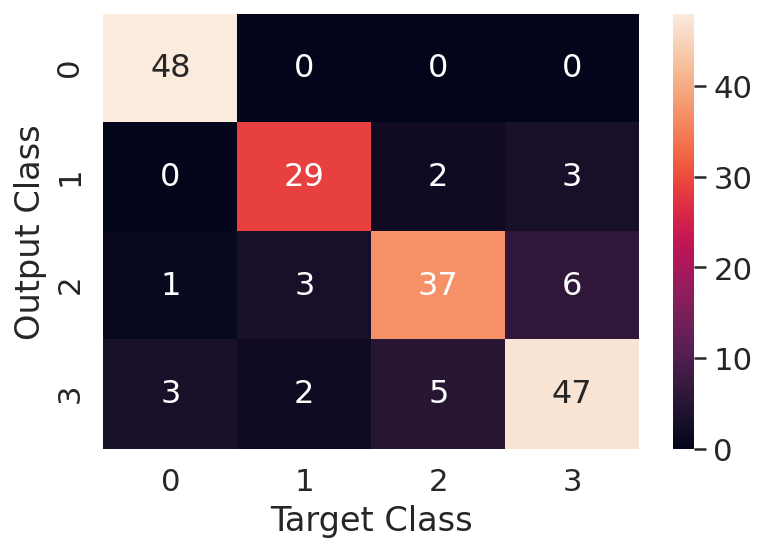

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
df_cm = pd.DataFrame(confusion_matrix, range(4), range(4))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g') # font size

plt.xlabel("Target Class")
plt.ylabel("Output Class")

plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as keras

# tf.enable_eager_execution()

  
def parameter_count():
    total = 0
    #for v in tf.trainable_variables():
    for v in tf.Variable():
        v_elements = 1
        for dim in v.get_shape():
            v_elements *= dim.value

        total += v_elements
    return total

In [ ]:

def combined_dataset(features, labels):
    assert features.shape[0] == labels.shape[0]
    dataset = tf.data.Dataset.from_tensor_slices(({'time_series': features}, labels))
    return dataset

def class_for_element(features, labels):
    return labels

# For training
def train_input_fn():
    print("I am here")
    dataset = combined_dataset(x_train, y_train)
    print( x_train.shape )
    return dataset.repeat().shuffle(5000).batch(50).prefetch(1)

# For evaluation and metrics
def eval_input_fn():
    dataset = combined_dataset(x_test, y_test)
    return dataset.batch(1000).prefetch(1)

In [ ]:


def conv_unit(unit, input_layer):
    s = '_' + str(unit)
    layer = keras.Conv1D(name='Conv1' + s, filters=32, kernel_size=5, strides=1, padding='same', activation='relu')(input_layer)
    layer = keras.Conv1D(name='Conv2' + s, filters=32, kernel_size=5, strides=1, padding='same', activation=None)(layer )
    layer = keras.Add(name='ResidualSum' + s)([layer, input_layer])
    layer = keras.Activation("relu", name='Act' + s)(layer)
    layer = keras.MaxPooling1D(name='MaxPool' + s, pool_size=5, strides=2)(layer)
    return layer

def cnn_model(input_layer, mode, params):
    current_layer = keras.Conv1D(filters=32, kernel_size=5, strides=1)(input_layer)

    for i in range(5):
        current_layer = conv_unit(i + 1, current_layer)

    current_layer = keras.Flatten()(current_layer)
    current_layer = keras.Dense(32, name='FC1', activation='relu')(current_layer)
    logits = keras.Dense(5, name='Output')(current_layer)
    
    print('Parameter count:', parameter_count())
    return logits

In [ ]:
CNN_MODEL_DIR = './Models/CNN-P1'

In [ ]:
# Initial learning rate
INITIAL_LEARNING_RATE = 0.001

# Learning rate decay per LR_DECAY_STEPS steps (1.0 = no decay)
LR_DECAY_RATE = 0.5

# Number of steps for LR to decay by LR_DECAY_RATE
LR_DECAY_STEPS = 4000

# Threshold for gradient clipping
GRADIENT_NORM_THRESH = 10.0

# Select model to train
MODEL_DIR = CNN_MODEL_DIR
MODEL_FN = cnn_model

def classifier_fn(features, labels, mode, params):
    is_training = mode == tf.estimator.ModeKeys.TRAIN
    #input_layer=tf.keras.layers.DenseFeatures(feature_columns=features)
    input_layer = tf.compat.v1.feature_column.input_layer(features, params['feature_columns'])
    input_layer = tf.expand_dims(input_layer, -1)

    logits = MODEL_FN(input_layer, mode, params)

    # For prediction, exit here
    predicted_classes = tf.argmax(logits, 1)
    if mode == tf.estimator.ModeKeys.PREDICT:
        predictions = {
            'class_ids': predicted_classes[:, tf.newaxis],
            'probabilities': tf.nn.softmax(logits),
            'logits': logits,
        }
        return tf.estimator.EstimatorSpec(mode, predictions=predictions)

    # For training and evaluation, compute the loss (MSE)
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

    accuracy = tf.metrics.accuracy(labels=labels, predictions=predicted_classes, name='acc_op')
    metrics = {'accuracy': accuracy}
    tf.summary.scalar('accuracy', accuracy[1])

    if mode == tf.estimator.ModeKeys.EVAL:
        return tf.estimator.EstimatorSpec(mode, loss=loss, eval_metric_ops=metrics)

    # For training...
    global_step = tf.train.get_global_step()
    learning_rate = tf.train.exponential_decay(INITIAL_LEARNING_RATE, global_step, LR_DECAY_STEPS, LR_DECAY_RATE)

    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    #optimizer = tf.contrib.estimator.clip_gradients_by_norm(optimizer, GRADIENT_NORM_THRESH)
    
    train_op = optimizer.minimize(loss, global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode, loss=loss, train_op=train_op)


In [ ]:
feature_columns = [tf.feature_column.numeric_column('time_series', [187])]

estimator = tf.compat.v1.estimator.Estimator(
    model_fn=classifier_fn,
    model_dir=MODEL_DIR,
    params={
        'feature_columns': feature_columns,
    })

estimator.train(train_input_fn, steps=4000)
info = estimator.evaluate(input_fn=eval_input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './Models/CNN-P1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
I am here
(742, 1980)
INFO:tensorflow:Calling model_fn.


ValueError: ignored